## Anggota Kelompok:

### 22.11. 5092 – Christian Nery Vandella

### 22.11.5113 – Taufiq Hidayatullah

### 22.11.5073 – M.Nasyid Yunitian Rizal

### 22.11.5099 – Sofyan



# Nomor 1

In [1]:
! kaggle datasets download nelgiriyewithana/apple-quality
! unzip /content/apple-quality.zip

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
License(s): other
apple-quality.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/apple-quality.zip
replace apple_quality.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [2]:
# read dataset apple_quality.csv menggunakan pyspark

!pip install pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("AppleQuality").getOrCreate()

df = spark.read.csv("/content/apple_quality.csv", header=True, inferSchema=True)

df.show()

+----+------------+------------+------------+------------+------------+------------+------------+-------+
|A_id|        Size|      Weight|   Sweetness| Crunchiness|   Juiciness|    Ripeness|     Acidity|Quality|
+----+------------+------------+------------+------------+------------+------------+------------+-------+
|   0|-3.970048523|-2.512336381| 5.346329613|-1.012008712| 1.844900361| 0.329839797|-0.491590483|   good|
|   1|-1.195217191|-2.839256528| 3.664058758| 1.588232309| 0.853285795| 0.867530082|-0.722809367|   good|
|   2|-0.292023862|-1.351281995|-1.738429162|-0.342615928| 2.838635512|-0.038033328| 2.621636473|    bad|
|   3|-0.657195773|-2.271626609| 1.324873847|-0.097874716| 3.637970491|-3.413761338| 0.790723217|   good|
|   4|  1.36421682|-1.296611877|-0.384658206| -0.55300577| 3.030874354|-1.303849429| 0.501984036|   good|
|   5|-3.425399755|-1.409082204|-1.913511195|-0.555774864| -3.85307147| 1.914615916|-2.981523169|    bad|
|   6| 1.331605736| 1.635955715| 0.875974244| 

In [3]:
# Menampilkan tipe data kolom
df.printSchema()

root
 |-- A_id: integer (nullable = true)
 |-- Size: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Sweetness: double (nullable = true)
 |-- Crunchiness: double (nullable = true)
 |-- Juiciness: double (nullable = true)
 |-- Ripeness: double (nullable = true)
 |-- Acidity: string (nullable = true)
 |-- Quality: string (nullable = true)



Disini kolom Acidity seharusnya numerik tetapi malah tipe datanya berupa string sehingga perlu diubah nantinya, dan juga Quality diubah ke numerik agar dapat digunakan untuk pelatihan model

In [4]:
# Merubah nama kolom dan menampilkan
df = df.withColumnRenamed('A_id', 'apple_id') \
                .withColumnRenamed('Size', 'diameter_cm') \
                .withColumnRenamed('Weight', 'weight_grams') \
                .withColumnRenamed('Sweetness', 'sweetness_level') \
                .withColumnRenamed('Crunchiness', 'crunchiness_level') \
                .withColumnRenamed('Juiciness', 'juiciness_level') \
                .withColumnRenamed('Ripeness', 'ripeness_level') \
                .withColumnRenamed('Acidity', 'acidity_level') \
                .withColumnRenamed('Quality', 'quality_grade')

df.show()

+--------+------------+------------+---------------+-----------------+---------------+--------------+-------------+-------------+
|apple_id| diameter_cm|weight_grams|sweetness_level|crunchiness_level|juiciness_level|ripeness_level|acidity_level|quality_grade|
+--------+------------+------------+---------------+-----------------+---------------+--------------+-------------+-------------+
|       0|-3.970048523|-2.512336381|    5.346329613|     -1.012008712|    1.844900361|   0.329839797| -0.491590483|         good|
|       1|-1.195217191|-2.839256528|    3.664058758|      1.588232309|    0.853285795|   0.867530082| -0.722809367|         good|
|       2|-0.292023862|-1.351281995|   -1.738429162|     -0.342615928|    2.838635512|  -0.038033328|  2.621636473|          bad|
|       3|-0.657195773|-2.271626609|    1.324873847|     -0.097874716|    3.637970491|  -3.413761338|  0.790723217|         good|
|       4|  1.36421682|-1.296611877|   -0.384658206|      -0.55300577|    3.030874354|  -1

**Penjelasan perubahan nama kolom:**

A_id menjadi apple_id - Lebih jelas mengidentifikasi ID unik apel

Size menjadi diameter_cm - Menspesifikkan ukuran dalam sentimeter

Weight menjadi weight_grams - Menspesifikkan berat dalam gram

Sweetness menjadi sweetness_level - Memperjelas bahwa ini tingkat kemanisan

Crunchiness menjadi crunchiness_level - Memperjelas bahwa ini tingkat kerenyahan

Juiciness menjadi juiciness_level - Memperjelas bahwa ini tingkat kejusian

Ripeness menjadi ripeness_level - Memperjelas bahwa ini tingkat kematangan

Acidity menjadi acidity_level - Memperjelas bahwa ini tingkat keasaman

Quality menjadi quality_grade - Memperjelas bahwa ini grade/tingkat kualitas apel

**Perubahan nama ini membuat dataset lebih:**

-Deskriptif dan self-explanatory

-Konsisten dalam penamaan (menggunakan underscore)

-Jelas dalam menunjukkan unit pengukuran

-Mudah dipahami oleh orang yang baru melihat dataset ini

In [5]:
from pyspark.sql.functions import col, sum

# Periksa nilai null di setiap kolom
df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

+--------+-----------+------------+---------------+-----------------+---------------+--------------+-------------+-------------+
|apple_id|diameter_cm|weight_grams|sweetness_level|crunchiness_level|juiciness_level|ripeness_level|acidity_level|quality_grade|
+--------+-----------+------------+---------------+-----------------+---------------+--------------+-------------+-------------+
|       1|          1|           1|              1|                1|              1|             1|            0|            1|
+--------+-----------+------------+---------------+-----------------+---------------+--------------+-------------+-------------+



Karena nilai value hanya terdapat satu maksimal per kolomnya, sehingga disini akan dilakukan drop nilai null

In [6]:
# Drop baris yang terdapat null value
df = df.dropna()

# Periksa nilai null di setiap kolom
df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

+--------+-----------+------------+---------------+-----------------+---------------+--------------+-------------+-------------+
|apple_id|diameter_cm|weight_grams|sweetness_level|crunchiness_level|juiciness_level|ripeness_level|acidity_level|quality_grade|
+--------+-----------+------------+---------------+-----------------+---------------+--------------+-------------+-------------+
|       0|          0|           0|              0|                0|              0|             0|            0|            0|
+--------+-----------+------------+---------------+-----------------+---------------+--------------+-------------+-------------+



Setelah didrop, bisa dilihat seluruh kolom sudah tidak terdapat nilai null lagi

In [7]:
from pyspark.sql.types import DoubleType, IntegerType
from pyspark.sql.functions import when

# Ubah tipe data 'Acidity' ke DoubleType dan 'Quality' ke IntegerType
df = df.withColumn("acidity_level", df["acidity_level"].cast(DoubleType()))
df = df.withColumn("quality_grade", when(df["quality_grade"] == "good", 1).otherwise(0).cast(IntegerType()))

# Menampilkan tipe data kolom yang sudah diubah
df.printSchema()

root
 |-- apple_id: integer (nullable = true)
 |-- diameter_cm: double (nullable = true)
 |-- weight_grams: double (nullable = true)
 |-- sweetness_level: double (nullable = true)
 |-- crunchiness_level: double (nullable = true)
 |-- juiciness_level: double (nullable = true)
 |-- ripeness_level: double (nullable = true)
 |-- acidity_level: double (nullable = true)
 |-- quality_grade: integer (nullable = false)



Singkatnya, kode ini mengubah tipe data kolom acidity_level menjadi double karena awalnya merupakan angka desimal tetapi tersimpan sebagai string. Kolom quality_grade diubah menjadi integer, dengan nilai 1 untuk 'good' dan 0 untuk 'bad', agar dapat digunakan dalam pelatihan model machine learning.

In [8]:
# Menampilkan summary df

df.summary().show()

+-------+------------------+-------------------+-------------------+--------------------+------------------+------------------+------------------+-------------------+------------------+
|summary|          apple_id|        diameter_cm|       weight_grams|     sweetness_level| crunchiness_level|   juiciness_level|    ripeness_level|      acidity_level|     quality_grade|
+-------+------------------+-------------------+-------------------+--------------------+------------------+------------------+------------------+-------------------+------------------+
|  count|              4000|               4000|               4000|                4000|              4000|              4000|              4000|               4000|              4000|
|   mean|            1999.5|-0.5030146298267509|-0.9895465445945022|-0.47047851978824984| 0.985477903858501|0.5121179684932494|0.4982774280305005|0.07687729571600004|             0.501|
| stddev|1154.8448669265786|   1.92805868885498| 1.6025072141517547|  

Hasil kode tersebut menampilkan ringkasan statistik deskriptif dari dataset kualitas apel, yang mencakup informasi seperti jumlah data, rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum untuk setiap kolom numerik pada dataset. Ringkasan ini memberikan gambaran umum tentang distribusi dan karakteristik data kualitas apel, seperti rata-rata diameter, berat, tingkat kemanisan, kerenyahan, keasaman, dan kualitas apel.

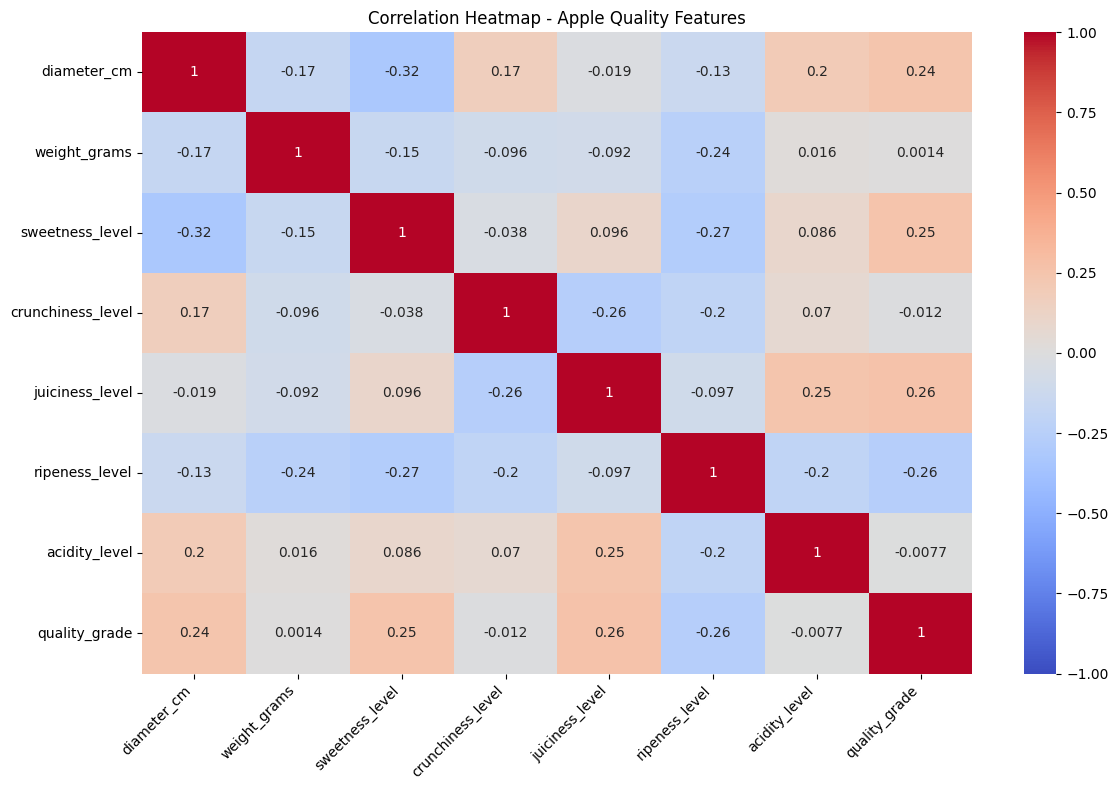

In [9]:
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Daftar kolom yang akan dianalisis
columns = ['diameter_cm', 'weight_grams', 'sweetness_level', 'crunchiness_level',
           'juiciness_level', 'ripeness_level', 'acidity_level', 'quality_grade']

# Membuat VectorAssembler untuk mengubah kolom menjadi vector
vector_assembler = VectorAssembler(
    inputCols=columns,
    outputCol="features"
)

# Mengaplikasikan VectorAssembler ke dataset
vector_data = vector_assembler.transform(df)

# Menghitung matriks korelasi
correlation_matrix = Correlation.corr(vector_data, "features").head()[0]

# Mengkonversi matriks korelasi ke format yang bisa dibaca
correlation_matrix_array = correlation_matrix.toArray()

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_array,
            xticklabels=columns,
            yticklabels=columns,
            annot=True,  # Menampilkan nilai korelasi
            cmap='coolwarm',  # Colormap: merah untuk positif, biru untuk negatif
            vmin=-1, vmax=1,  # Rentang nilai korelasi
            center=0)  # Nilai tengah colormap

plt.title('Correlation Heatmap - Apple Quality Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# Menampilkan korelasi dalam format teks
print("\nKorelasi antar fitur:")
print("-" * 80)
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        correlation = correlation_matrix_array[i][j]
        print(f"Korelasi antara {columns[i]:15} dan {columns[j]:15}: {correlation:.3f}")


Korelasi antar fitur:
--------------------------------------------------------------------------------
Korelasi antara diameter_cm     dan weight_grams   : -0.171
Korelasi antara diameter_cm     dan sweetness_level: -0.325
Korelasi antara diameter_cm     dan crunchiness_level: 0.170
Korelasi antara diameter_cm     dan juiciness_level: -0.019
Korelasi antara diameter_cm     dan ripeness_level : -0.135
Korelasi antara diameter_cm     dan acidity_level  : 0.196
Korelasi antara diameter_cm     dan quality_grade  : 0.244
Korelasi antara weight_grams    dan sweetness_level: -0.154
Korelasi antara weight_grams    dan crunchiness_level: -0.096
Korelasi antara weight_grams    dan juiciness_level: -0.092
Korelasi antara weight_grams    dan ripeness_level : -0.244
Korelasi antara weight_grams    dan acidity_level  : 0.016
Korelasi antara weight_grams    dan quality_grade  : 0.001
Korelasi antara sweetness_level dan crunchiness_level: -0.038
Korelasi antara sweetness_level dan juiciness_level: 0.

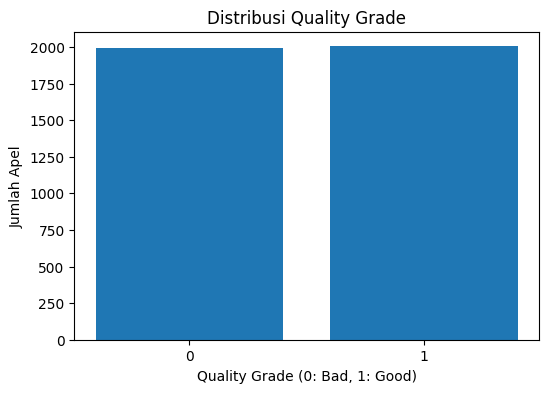

In [11]:
#1. Bar Chart: Distribusi Quality Grade
import matplotlib.pyplot as plt

# Menghitung jumlah apel untuk setiap quality_grade
quality_counts = df.groupBy('quality_grade').count().collect()

# Mengambil nilai quality_grade dan jumlahnya
quality_grades = [row['quality_grade'] for row in quality_counts]
counts = [row['count'] for row in quality_counts]

# Membuat bar chart
plt.figure(figsize=(6, 4))
plt.bar(quality_grades, counts)
plt.title('Distribusi Quality Grade')
plt.xlabel('Quality Grade (0: Bad, 1: Good)')
plt.ylabel('Jumlah Apel')
plt.xticks(quality_grades)
plt.show()

Berdasarkan bar chart distribusi quality grade, terlihat bahwa jumlah apel dengan kualitas "good" (1) dan "bad" (0) hampir seimbang, dengan 2004 apel dikategorikan sebagai "good" dan 1996 apel dikategorikan sebagai "bad". Hal ini menunjukkan bahwa dataset memiliki distribusi kualitas apel yang relatif merata antara kedua kategori tersebut.

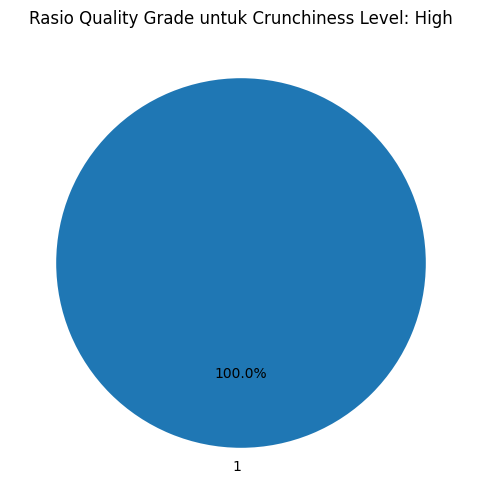

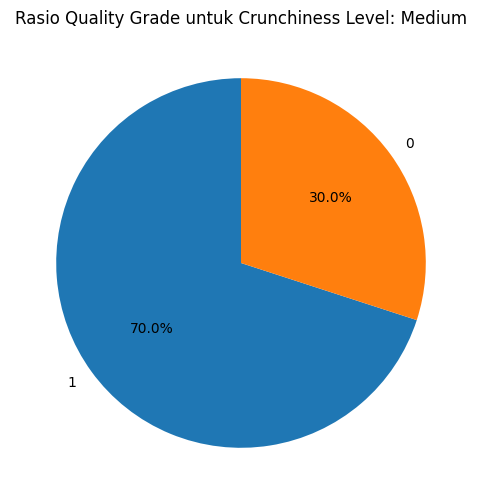

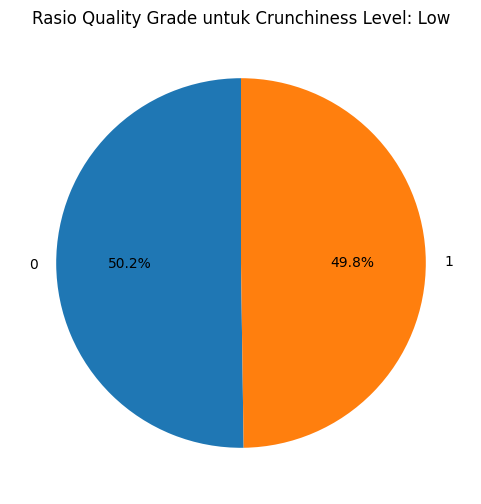

In [12]:
# 2.Pie Chart rasio kualitas apel (good/bad) berdasarkan kategori crunchiness_level
# Definisikan fungsi untuk kategori crunchiness
def crunchiness_category(crunchiness_level):
    if crunchiness_level < 4:
        return "Low"
    elif crunchiness_level < 7:
        return "Medium"
    else:
        return "High"

# Daftarkan fungsi sebagai UDF
crunchiness_udf = F.udf(crunchiness_category)

# Buat DataFrame baru dengan kolom kategori crunchiness
df_with_category = df.withColumn("crunchiness_category", crunchiness_udf(df["crunchiness_level"]))

# Hitung jumlah apel good dan bad untuk setiap kategori crunchiness
crunchiness_quality_counts = df_with_category.groupBy("crunchiness_category", "quality_grade").count().toPandas()

# Buat pie chart untuk setiap kategori crunchiness
for category in crunchiness_quality_counts["crunchiness_category"].unique():
    # Filter data untuk kategori tertentu
    category_data = crunchiness_quality_counts[crunchiness_quality_counts["crunchiness_category"] == category]

    # Buat pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(category_data["count"], labels=category_data["quality_grade"], autopct='%1.1f%%', startangle=90)
    plt.title(f'Rasio Quality Grade untuk Crunchiness Level: {category}')
    plt.show()

Visualisasi data pie chart menunjukkan bahwa terdapat hubungan yang kuat antara tingkat kerenyahan (crunchiness level) apel dengan kualitasnya (quality grade). Apel dengan tingkat kerenyahan tinggi (High) memiliki kualitas yang sangat baik, dengan 100% apel dalam kategori ini diklasifikasikan sebagai "good".

Pada apel dengan tingkat kerenyahan sedang (Medium), kualitasnya masih cukup baik dengan 70% apel dikategorikan sebagai "good". Namun, apel dengan tingkat kerenyahan rendah (Low) menunjukkan kualitas yang beragam, dengan persentase apel "good" dan "bad" hampir seimbang (49.8% vs 50.2%). Hal ini mengindikasikan bahwa tingkat kerenyahan merupakan faktor penting dalam menentukan kualitas apel, di mana kerenyahan yang lebih tinggi cenderung berkorelasi dengan kualitas yang lebih baik.

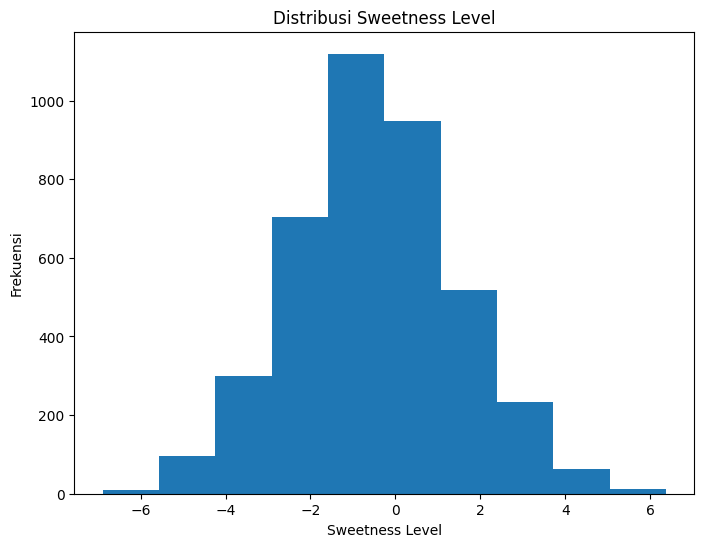

In [13]:
#3. Histogram: Distribusi Sweetness Level
import matplotlib.pyplot as plt

# Mengambil data sweetness_level dari Spark DataFrame
sweetness_data = df.select('sweetness_level').rdd.flatMap(lambda x: x).collect()

# Membuat histogram
plt.figure(figsize=(8, 6))
plt.hist(sweetness_data, bins=10)
plt.title('Distribusi Sweetness Level')
plt.xlabel('Sweetness Level')
plt.ylabel('Frekuensi')
plt.show()

Histogram distribusi tingkat kemanisan (sweetness level) menunjukkan bahwa sebagian besar apel memiliki tingkat kemanisan antara -2 dan 1, dengan distribusi yang cenderung normal. Ini mengindikasikan bahwa tingkat kemanisan apel dalam dataset terkonsentrasi di sekitar rentang tersebut, dengan sedikit apel yang memiliki tingkat kemanisan sangat rendah atau sangat tinggi.

<ipython-input-14-67a639d8486c>:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([bad_crunchiness, good_crunchiness], labels=['Bad (0)', 'Good (1)'])


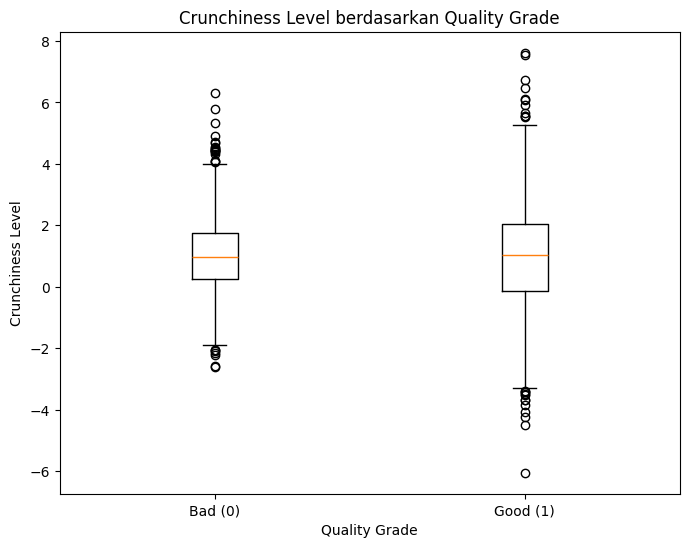

In [14]:
#4. Box Plot: Crunchiness Level berdasarkan Quality Grade
import matplotlib.pyplot as plt
import numpy as np

# Mengambil data crunchiness_level dan quality_grade dari Spark DataFrame
data = df.select('crunchiness_level', 'quality_grade').rdd.map(lambda row: (row[1], row[0])).collect()

# Memisahkan data berdasarkan quality_grade
bad_crunchiness = [d[1] for d in data if d[0] == 0]
good_crunchiness = [d[1] for d in data if d[0] == 1]

# Membuat box plot
plt.figure(figsize=(8, 6))
plt.boxplot([bad_crunchiness, good_crunchiness], labels=['Bad (0)', 'Good (1)'])
plt.title('Crunchiness Level berdasarkan Quality Grade')
plt.xlabel('Quality Grade')
plt.ylabel('Crunchiness Level')
plt.show()

Box plot menunjukkan bahwa apel berkualitas "good" cenderung memiliki tingkat kerenyahan (crunchiness level) yang lebih tinggi dibandingkan dengan apel berkualitas "bad". Meskipun terdapat beberapa outlier pada kedua kategori, apel berkualitas "good" memiliki median dan rentang interkuartil (IQR) yang lebih tinggi. Apel "bad" memiliki rentang crunchiness level dari -2.62 hingga 6.29, sementara apel "good" memiliki rentang yang lebih luas, yaitu -6.05 hingga 7.61.

In [15]:
# Menampilkan 10 baris pertama dataset
df.show(10)

+--------+------------+------------+---------------+-----------------+---------------+--------------+-------------+-------------+
|apple_id| diameter_cm|weight_grams|sweetness_level|crunchiness_level|juiciness_level|ripeness_level|acidity_level|quality_grade|
+--------+------------+------------+---------------+-----------------+---------------+--------------+-------------+-------------+
|       0|-3.970048523|-2.512336381|    5.346329613|     -1.012008712|    1.844900361|   0.329839797| -0.491590483|            1|
|       1|-1.195217191|-2.839256528|    3.664058758|      1.588232309|    0.853285795|   0.867530082| -0.722809367|            1|
|       2|-0.292023862|-1.351281995|   -1.738429162|     -0.342615928|    2.838635512|  -0.038033328|  2.621636473|            0|
|       3|-0.657195773|-2.271626609|    1.324873847|     -0.097874716|    3.637970491|  -3.413761338|  0.790723217|            1|
|       4|  1.36421682|-1.296611877|   -0.384658206|      -0.55300577|    3.030874354|  -1

**Rekomendasi Pemilihan Fitur**

Berdasarkan analisis di atas, berikut adalah rekomendasi fitur yang relevan untuk memprediksi quality_grade:

- ripeness_level: Korelasi negatif terkuat dengan quality_grade.

- juiciness_level: Korelasi positif terkuat dengan quality_grade.

- sweetness_level: Korelasi positif kuat dengan quality_grade. Pertimbangkan untuk tidak menggunakannya bersamaan dengan ripeness_level jika model terlalu kompleks.

- diameter_cm: Korelasi positif cukup kuat dengan quality_grade.

- crunchiness_level: Berpotensi memberikan informasi penting berdasarkan visualisasi data, meskipun korelasinya rendah.

- acidity_level: Berpotensi memberikan informasi penting berdasarkan visualisasi data, meskipun korelasinya rendah.

Kesimpulannya saya tetap memakai semua kolom kecuali apple_id untuk memprediksi quality_grade.

# Nomor 2

In [16]:
# Drop kolom apple_id

df = df.drop('apple_id')
df.show()

+------------+------------+---------------+-----------------+---------------+--------------+-------------+-------------+
| diameter_cm|weight_grams|sweetness_level|crunchiness_level|juiciness_level|ripeness_level|acidity_level|quality_grade|
+------------+------------+---------------+-----------------+---------------+--------------+-------------+-------------+
|-3.970048523|-2.512336381|    5.346329613|     -1.012008712|    1.844900361|   0.329839797| -0.491590483|            1|
|-1.195217191|-2.839256528|    3.664058758|      1.588232309|    0.853285795|   0.867530082| -0.722809367|            1|
|-0.292023862|-1.351281995|   -1.738429162|     -0.342615928|    2.838635512|  -0.038033328|  2.621636473|            0|
|-0.657195773|-2.271626609|    1.324873847|     -0.097874716|    3.637970491|  -3.413761338|  0.790723217|            1|
|  1.36421682|-1.296611877|   -0.384658206|      -0.55300577|    3.030874354|  -1.303849429|  0.501984036|            1|
|-3.425399755|-1.409082204|   -1

Drop kolom apple_id karena tidak dpakai untuk melatih model

In [17]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression, DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Definisikan fitur dan target
feature_cols = ['diameter_cm', 'weight_grams', 'sweetness_level', 'crunchiness_level',
                'juiciness_level', 'ripeness_level', 'acidity_level']
target_col = 'quality_grade'

# Buat VectorAssembler
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_assembled = assembler.transform(df)

# Pisahkan data training dan testing
(train_data, test_data) = df_assembled.randomSplit([0.7, 0.3], seed=42)

Kode tersebut mempersiapkan data untuk pelatihan model machine learning dengan PySpark. Pertama, fitur-fitur yang relevan ('diameter_cm', 'weight_grams', dll.) dan target ('quality_grade') didefinisikan. Kemudian, VectorAssembler digunakan untuk menggabungkan fitur-fitur tersebut menjadi satu kolom vektor bernama "features". Data yang sudah digabungkan ini kemudian dibagi menjadi data training (70%) dan data testing (30%) menggunakan randomSplit dengan seed 42 untuk memastikan pembagian data yang konsisten. Data yang telah diproses ini selanjutnya akan digunakan untuk melatih dan mengevaluasi berbagai model machine learning seperti Random Forest, Gradient Boost Tree, Logistic Regression, dan Decision Tree.

In [18]:
# 1.Random Forest
rf = RandomForestClassifier(labelCol=target_col, featuresCol="features", numTrees=100, seed=42)
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# 2.Gradient Boost Tree
gbt = GBTClassifier(labelCol=target_col, featuresCol="features", maxIter=100, seed=42)
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)

# 3.Logistic Regression
lr = LogisticRegression(labelCol=target_col, featuresCol="features", maxIter=100, regParam=0.1, elasticNetParam=0.8)
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)

# 4.Decision Tree
dt = DecisionTreeClassifier(labelCol=target_col, featuresCol="features", maxDepth=5, seed=42)
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

Kode tersebut mendefinisikan dan melatih empat model machine learning yang berbeda, yaitu Random Forest, Gradient Boost Tree, Logistic Regression, dan Decision Tree, menggunakan PySpark. Setiap model diinisialisasi dengan parameter spesifik, dilatih menggunakan data training (train_data), dan kemudian digunakan untuk membuat prediksi pada data testing (test_data). Hasil prediksi dari setiap model disimpan dalam variabel terpisah (rf_predictions, gbt_predictions, lr_predictions, dt_predictions) untuk evaluasi dan perbandingan performa model selanjutnya.

In [19]:
# Definisikan evaluator
evaluator_auc = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol=target_col, metricName="areaUnderROC")
evaluator_acc = MulticlassClassificationEvaluator(labelCol=target_col, predictionCol="prediction", metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol=target_col, predictionCol="prediction", metricName="f1")
evaluator_precision = MulticlassClassificationEvaluator(labelCol=target_col, predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol=target_col, predictionCol="prediction", metricName="weightedRecall")

# Hitung metrik untuk setiap model
models = [rf_predictions, gbt_predictions, lr_predictions, dt_predictions]
model_names = ["Random Forest", "Gradient Boost Tree", "Logistic Regression", "Decision Tree"]
metrics = ["AUC", "Accuracy", "F1 Score", "Precision", "Recall"]
evaluators = [evaluator_auc, evaluator_acc, evaluator_f1, evaluator_precision, evaluator_recall]

results = []
for i, model in enumerate(models):
    row = [model_names[i]]
    for evaluator in evaluators:
        metric_value = evaluator.evaluate(model)
        row.append(metric_value)
    results.append(row)

# Tampilkan hasil dalam bentuk tabel
print("Perbandingan Model:")
print("{:<25} {:<10} {:<10} {:<10} {:<10} {:<10}".format("Model", "AUC", "Accuracy", "F1 Score", "Precision", "Recall"))
for row in results:
    print("{:<25} {:<10.3f} {:<10.3f} {:<10.3f} {:<10.3f} {:<10.3f}".format(*row))

Perbandingan Model:
Model                     AUC        Accuracy   F1 Score   Precision  Recall    
Random Forest             0.898      0.810      0.809      0.815      0.810     
Gradient Boost Tree       0.936      0.846      0.846      0.846      0.846     
Logistic Regression       0.785      0.701      0.701      0.701      0.701     
Decision Tree             0.654      0.726      0.725      0.730      0.726     


Berdasarkan hasil perbandingan model yang ada, Gradient Boost Tree dan Random Forest memiliki performa terbaik. Mari kita lakukan hyperparameter tuning pada kedua model tersebut dan tentukan model terbaik.

In [20]:
# 1. Hyperparameter Tuning Gradient Boost Tree
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Definisikan parameter grid untuk Gradient Boost Tree
paramGrid_gbt = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [5, 10]) # Mencoba dua nilai maxDepth
             .addGrid(gbt.maxIter, [20, 50]) # Mencoba dua nilai maxIter
             .build())

# Buat CrossValidator untuk Gradient Boost Tree
cv_gbt = CrossValidator(estimator=gbt,
                          estimatorParamMaps=paramGrid_gbt,
                          evaluator=evaluator_auc,
                          numFolds=3,
                          seed=42)

# Latih model dengan CrossValidator
cvModel_gbt = cv_gbt.fit(train_data)

# Dapatkan model terbaik
bestModel_gbt = cvModel_gbt.bestModel

# Evaluasi model terbaik
gbt_predictions_tuned = bestModel_gbt.transform(test_data)
gbt_auc_tuned = evaluator_auc.evaluate(gbt_predictions_tuned)

# 2. Hyperparameter Tuning Random Forest
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Definisikan parameter grid untuk Random Forest
paramGrid_rf = (ParamGridBuilder()
             .addGrid(rf.numTrees, [50, 100]) # Mencoba dua nilai numTrees
             .addGrid(rf.maxDepth, [5, 10]) # Mencoba dua nilai maxDepth
             .build())

# Buat CrossValidator untuk Random Forest
cv_rf = CrossValidator(estimator=rf,
                        estimatorParamMaps=paramGrid_rf,
                        evaluator=evaluator_auc,
                        numFolds=3,
                        seed=42)

# Latih model dengan CrossValidator
cvModel_rf = cv_rf.fit(train_data)

# Dapatkan model terbaik
bestModel_rf = cvModel_rf.bestModel

# Evaluasi model terbaik
rf_predictions_tuned = bestModel_rf.transform(test_data)
rf_auc_tuned = evaluator_auc.evaluate(rf_predictions_tuned)

print("Hasil Tuning:")
print("-" * 20)
print("Gradient Boost Tree (AUC):", gbt_auc_tuned)
print("Random Forest (AUC):", rf_auc_tuned)

Hasil Tuning:
--------------------
Gradient Boost Tree (AUC): 0.9297361021251189
Random Forest (AUC): 0.9477741004329899


Model terbaik untuk memprediksi kualitas apel adalah Random Forest. Model ini memiliki akurasi dan AUC tertinggi setelah hyperparameter tuning, menunjukkan kemampuannya yang sangat baik dalam membedakan apel "good" dan "bad". Keunggulan Random Forest terletak pada kemampuannya menangani outlier dan fitur yang berkorelasi, yang terdapat dalam data kualitas apel.

Random Forest cocok untuk data dengan banyak fitur dan hubungan non-linear, seperti data kualitas apel yang memiliki 7 fitur dengan kemungkinan hubungan kompleks antar fitur. Meskipun data memiliki outlier dan fitur yang berkorelasi, Random Forest tetap mampu menghasilkan performa yang baik. Oleh karena itu, Random Forest merupakan pilihan model yang tepat untuk memprediksi kualitas apel berdasarkan data yang ada.